# (Data) Science behind successful Android Apps and how yours can be one!

## Business Understanding

Being an Android fan and a developer myself, I cannot resist myself from using my new data skills to do some analyses on existing apps available on the play store and use this analysis in making informed decisions for my next project!

The business questions which I will try to answer and reason are:
1. What category of apps should a developer target for bursting onto the scene?
2. Does size of an app affect its popularity and rating?
3. How do paid apps fare against free apps in terms of populariy and sentiment?
4. Wordcloud

Finally I'll combine all the observations:
4. What makes an app 'successful' on play store?

## Data Understanding

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from wordcloud import WordCloud, STOPWORDS

init_notebook_mode(connected=True)

%matplotlib inline
sns.set(rc={'figure.figsize':(15, 8)})
plt.rcParams['figure.figsize'] = 15, 8

In [2]:
os.listdir('./data/')

['googleplaystore_user_reviews.csv', 'googleplaystore.csv']

In [3]:
apps_df = pd.read_csv("./data/googleplaystore.csv")
apps_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [4]:
app_reviews_df = pd.read_csv("./data/googleplaystore_user_reviews.csv")
app_reviews_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [5]:
print("Apps Data:")
print("Number of apps in data: ", apps_df.shape[0])
print("Number of features: ",apps_df.shape[1])
print("\nData Types:")
print(apps_df.dtypes.value_counts())

Apps Data:
Number of apps in data:  10841
Number of features:  13

Data Types:
object     12
float64     1
dtype: int64


In [6]:
print("Reviews Data: ")
print("Total reviews in data: ", app_reviews_df.shape[0])
print("Average reviews per app: ", round(app_reviews_df.shape[0] / apps_df.shape[0]))

print("\nData Types:")
print(app_reviews_df.dtypes.value_counts())

Reviews Data: 
Total reviews in data:  64295
Average reviews per app:  6

Data Types:
object     3
float64    2
dtype: int64


The data has 12 categorical features and 1 numeric feature (Rating)

## Prepare Data:

### Size

We can see that size has been expressed as String, but we can convert it to numeric feature by handling the metrics (MB, KB, etc)

In [7]:
apps_df.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
293k                     1
186k                     1
412k                     1
872k                     1
552k                     1
44k                      1
2

First, I'll replace 'Varies with device' with NaN, as it denotes that size is not known. We'll later see how to handle these during analysis.
Secondly, replace apps with size 1000+ with 1000

In [8]:
apps_df.Size = apps_df.Size.replace('Varies with device', np.nan)
apps_df.Size = apps_df.Size.replace('1,000+', 1000)

Now, we'll convert sizes in KB to MB so that we have uniformity in metric

In [9]:
apps_df.Size = apps_df.Size.str.replace('k', 'e-3')
apps_df.Size = apps_df.Size.str.replace('M', '')

In [10]:
apps_df.Size.value_counts(dropna = False)

NaN        1696
11          198
12          196
14          194
13          191
15          184
17          160
19          154
16          149
26          149
25          143
20          139
21          138
10          136
24          136
18          133
23          117
22          114
29          103
27           97
28           95
30           84
33           79
3.3          77
37           76
35           72
31           70
2.9          69
2.5          68
2.3          68
           ... 
210e-3        1
378e-3        1
688e-3        1
913e-3        1
887e-3        1
861e-3        1
404e-3        1
980e-3        1
116e-3        1
881e-3        1
234e-3        1
754e-3        1
467e-3        1
173e-3        1
924e-3        1
269e-3        1
243e-3        1
78e-3         1
314e-3        1
221e-3        1
629e-3        1
779e-3        1
1020e-3       1
975e-3        1
292e-3        1
50e-3         1
506e-3        1
992e-3        1
857e-3        1
193e-3        1
Name: Size, Length: 461,

Now, let's convert the feature to numeric

In [11]:
apps_df.Size = pd.to_numeric(apps_df.Size)
sizeHist = [go.Histogram(x=apps_df.Size)]
iplot(sizeHist)

In [12]:

def clean_size_feature(df):
    """
    Function to clean Size column
    """
    df.Size = df.Size.replace('Varies with device', np.nan)
    df.Size = df.Size.replace('1,000+', 1000)
    df.Size = df.Size.str.replace('k', 'e-3')
    df.Size = df.Size.str.replace('M', '')
    df.Size = pd.to_numeric(df.Size)
    return df

We can also convert number of installs to numeric feature.

### Installs

In [13]:
apps_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [14]:

def clean_installs_feature(df):
    """
    Function to clean Installs column
    """
    df.Installs = df.Installs.str.replace(',', '')
    df.Installs = df.Installs.str.replace('+', '')
    df.Installs = df.Installs.replace('Free', np.nan)
    df.Installs = pd.to_numeric(df.Installs)
    return df

In [15]:
apps_df = clean_installs_feature(apps_df)
apps_df.Installs = pd.to_numeric(apps_df.Installs)

In [16]:
apps_df.Installs.value_counts()

1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
1.000000e+03     907
5.000000e+06     752
1.000000e+02     719
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
1.000000e+01     386
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      15
Name: Installs, dtype: int64

### Reviews

Let's convert number of reviews to integer

In [17]:

def clean_reviews_feature(df):
    """
    Feature to clean Reviews column
    """ 
    df.Reviews = df.Reviews.str.replace('M', 'e+6')
    df.Reviews = pd.to_numeric(df.Reviews)
    return df

In [18]:
apps_df = clean_reviews_feature(apps_df)
apps_df.Reviews.value_counts().head()

0.0    596
1.0    272
2.0    214
3.0    175
4.0    137
Name: Reviews, dtype: int64

### Price

Now, we will convert price to numeric feature

In [19]:
apps_df.Price.value_counts()

0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$7.99           7
$3.49           7
$24.99          7
$29.99          7
$5.49           6
$19.99          6
$12.99          5
$8.99           5
$6.49           5
$11.99          5
$2.00           3
$10.00          3
$1.00           3
$16.99          3
$7.49           2
$9.00           2
            ...  
$1.76           1
$37.99          1
$2.59           1
$4.29           1
$3.61           1
$4.85           1
$2.95           1
$299.99         1
$4.84           1
$18.99          1
$4.77           1
$1.29           1
$2.90           1
Everyone        1
$14.00          1
$1.97           1
$3.90           1
$1.26           1
$1.61           1
$2.50           1
$400.00         1
$28.99          1
$5.00           1
$1.59           1
$4.60     

In [20]:
def clean_price_feature(df):
    """
    Function to clean Price column 
    """
    df = df.drop(df.loc[df.Category == "1.9"].index)
    df.Price = df.Price.replace('Everyone', np.nan)
    df.Price = df.Price.str.replace('$', '')
    df.Price = pd.to_numeric(df.Price)
    return df

In [21]:
apps_df = clean_price_feature(apps_df)
apps_df.Price.value_counts().head()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
Name: Price, dtype: int64

In [22]:
apps_df.loc[apps_df.Category == "1.9"].index

Int64Index([], dtype='int64')

### Handling Missing Values:

In [23]:
apps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

There are few nulls in Rating and Size columns. These I have purposefully made null which will be ignored while plotting so they won't interfere with the analysis. I'm not planning to run any machine learning models, so I won't be handling these nulls for now.

Not using current ver and android ver columns, so I will drop those columns

In [24]:
apps_df = apps_df.drop(['Current Ver', 'Android Ver'], axis=1)

Let's see which apps have maximum missing values. Out of 11 columns, if an app has more than 6 features missing data, I will drop the row

In [25]:
apps_df.loc[apps_df.isna().sum(1) >= 5]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated]
Index: []

As we can see, there are no apps with more than 50% features missing, so skipping this step

### Function to combine Reviews dataset with Apps dataset

In [26]:
def combine_reviews(apps, reviews):
    """
    Combines apps dataset with reviews dataset
    Parameters:
        apps: Apps dataframe
        reviews: Reviews dataframe
    """
    return pd.merge(apps, reviews, how="inner", on="App")

### Function to Clean Dataset:

In [27]:
def clean_dataset(df):
    """
    Cleans the full dataset
    """
    df = clean_size_feature(df)
    df = clean_installs_feature(df)
    df = clean_price_feature(df)
    df = clean_reviews_feature(df)
    df = df.drop(['Current Ver', 'Android Ver'], axis=1)
    df = df.drop(apps_df.loc[apps_df.isna().sum(1) >= 5].index)
    return df

### Functions to visualize data:

In [28]:

def plot_pie(values, labels):
    """
    Plot a pie chart
    Parameters: 
        values: values to plot on the pie
        labels: Labels for the values
    """
    data = [go.Pie(values=values, labels=labels)]
    iplot(data)
    
    
def plot_bar(x, y):
    """
    Plot a bar chart
    Parameters: 
        x: Feature to plot on X-axis
        y: Feature to plot on Y-axis
    """
    data = [go.Bar(x=x, y=y)]
    iplot(data)
    

def plot_violin(x, y):
    """
    Plot a violin chart
    Parameters: 
        x: Feature to plot on X-axis
        y: Feature to plot on Y-axis
    """
    data = [go.Violin(x=x, y=y)]
    iplot(data) 
    

def plot_box(x, y):
    """
    Plot a box chart
    Parameters: 
        x: Feature to plot on X-axis
        y: Feature to plot on Y-axis
    """
    data = [go.Box(x=x, y=y)]
    iplot(data)
    
    
def plot_hist(x, y=None, cumulative=False):
    """
    Plot a histogram. If y is also passed then plot a 2d histogram
    Parameters: 
        x (required): Feature to plot on X-axis
        y: Feature to plot on Y-axis
        cumulative: If true, plot will a cumulative graph
    """
    if cumulative:
        data = [go.Histogram(x=x, histnorm='probability', cumulative=dict(enabled=True))]
    elif y is not None and not cumulative:
        data = [go.Histogram2d(x=x, y=y)]
    else:
        data = [go.Histogram(x=x)]
    iplot(data)          

## Q1: What categories should Developers target?

Let's visualize app categories

In [29]:
category_count = dict(apps_df.Category.value_counts())

In [30]:
plot_bar(list(category_count.keys()), list(category_count.values()))

We can see that most apps are of the category FAMILY. Followed by GAMES. Let's see the market share of each category

In [31]:
plot_pie(labels=list(category_count.keys()), values=list(category_count.values()))

Almost 30% of the apps on Play Store belong to either Family or Games category. It suggests that these categories are saturated and it will be difficult to make a stand-out app in this category due to competition. 

Let's see how each category fares in terms of ratings and installs

In [32]:
categories = list(category_count.keys())

In [33]:
plot_violin(x=apps_df.Category, y=apps_df.Rating)
plot_box(x=apps_df.Category, y=apps_df.Rating)

Almost all categories have similar average rating. Let's see how it varies with Installs

In [34]:
plot_bar(x=apps_df.Category, y=apps_df.Installs)

As we can see, the following categories are very popular among people:
1. Books and Reference
2. Entertainment
3. Game
4. Social
5. Photography
6. Travel
7. Tools

Comparing it with boxplot we can see that 
1. 75% Entertainment apps have ratings below 4.3 whereas the number of installs is more than 10M among only 149 apps. This shows that entertainment apps have high demand but there aren't enough high quality apps in this category, so developers can target this.
2. Similarly, there are only 258 Travel apps while they are high in demand. So developers can target this category as well

## Q2: Does size of the app affect its popularity and rating?

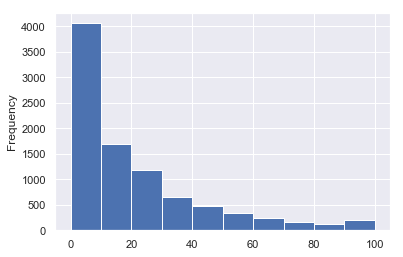

In [35]:
apps_df.Size.plot(kind='hist')

Let's plot a cumulative histogram showing app sizes and their market share

In [36]:
plot_hist(x=apps_df.Size, cumulative=True)

As we can see, almost 45% of the apps have app size less than 10MB

Let's compare ratings and installs of apps above 10MB and below it.

In [37]:
apps_above_10mb = apps_df[apps_df.Size > 10]
apps_below_10mb = apps_df[apps_df.Size <= 10]

In [38]:
print("Num of apps with size <10MB: ", apps_below_10mb.shape[0])
print("Num of apps with size >10MB: ", apps_above_10mb.shape[0])

Num of apps with size <10MB:  4060
Num of apps with size >10MB:  5085


In [39]:
trace_above_10 = go.Box(y=apps_above_10mb.Rating, name="App Size > 10MB")
trace_below_10 = go.Box(y=apps_below_10mb.Rating, name="App Size < 10MB")
data = [trace_below_10, trace_above_10]
iplot(data)

There is not much to learn here. Both have similar median ratings. Let's compare number of installs

In [40]:
print("Number of avg installs of apps > 10mb: ", apps_above_10mb.Installs.sum() / apps_above_10mb.shape[0])
print("Number of avg installs of apps < 10mb: ", apps_below_10mb.Installs.sum() / apps_below_10mb.shape[0])

Number of avg installs of apps > 10mb:  11805963.883775812
Number of avg installs of apps < 10mb:  1239385.9889162562


Number of average install for apps with size more than 25MB is actually greater. It can be due to the fact that heavier apps provide better experience and features compared to lighter apps.

Let's see how rating varies with size

In [41]:
plot_hist(x=apps_df.Size, y=apps_df.Rating)

In [42]:
print("Average rating of apps below 10MB: ", apps_above_10mb.Rating.sum() / apps_above_10mb.shape[0])
print("Average rating of apps above 10MB: ", apps_below_10mb.Rating.sum() / apps_below_10mb.shape[0])

Average rating of apps below 10MB:  3.7010226155358894
Average rating of apps above 10MB:  3.310344827586207


Let's see the size statistics of top rated apps

In [43]:
top_rated_apps = apps_df[apps_df.Rating >= 4.5]

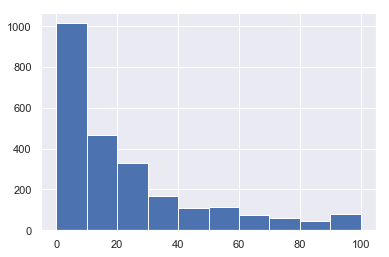

In [44]:
top_rated_apps.Size.hist()

In [45]:
plot_hist(x=top_rated_apps.Size, cumulative=True)

So we conclude that users don't seem to be concerned much with the size of the app. However, lighter apps do have higher rating compared to heavier apps. 75% of the top rated apps have app size less than 30MB.

## Q3: Are paid apps really worth paying for?

In [46]:
paid_apps = apps_df[apps_df['Type'] == 'Paid']
free_apps = apps_df[apps_df['Type'] == 'Free']

In [47]:
data = [
    go.Pie(
        title="Free vs Paid: Num of apps", 
        values = [paid_apps.shape[0], free_apps.shape[0]], 
        labels=['Paid', 'Free'], 
        domain={'x': [0, .48],'y': [0, 1]}
    ),
    go.Pie(
        values = [paid_apps.Installs.sum(), free_apps.Installs.sum()], 
        labels=['Paid', 'Free'],
        domain={'x': [0.52, 1],'y': [0, 1]}
    )]
iplot(data)

Installs as we can see are almost negligible compared to free apps. So they aren't very famous.
Let's see whether paid apps are of better quality than free apps overall by comparing their ratings

In [48]:
trace_paid = go.Box(y=paid_apps.Rating, name="Paid Apps")
trace_free = go.Box(y=free_apps.Rating, name="Free Apps")
data = [trace_free, trace_paid]
layout = go.Layout(yaxis=dict(title= "Rating"))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

As we can see, not much difference in the ratings as well. Median rating for Paid apps is only 0.1 higher than free ones. Let's compare the app size before concluding anything.

In [49]:
trace_paid = go.Box(y=paid_apps.Size, name="Paid Apps")
trace_free = go.Box(y=free_apps.Size, name="Free Apps")
data = [trace_free, trace_paid]
layout = go.Layout(yaxis=dict(title= "Size"))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Again, not much difference in app size as well. But worth noting that, while range of size for free apps is between 5MB and 30MB, that for free apps is between 2MB and 28MB.

Let's check how top rated apps are priced

In [50]:
iplot([go.Histogram(x=top_rated_apps.Price)])
plot_hist(x=top_rated_apps.Price)

In [51]:
top_rated_apps[top_rated_apps.Price == 0].shape[0] / top_rated_apps.shape[0]

0.904906937394247

Almost all top-rated apps are priced between $0-$10.  
90% of top rated apps are free.

Since there are no major diffentiators between paid and free apps, users seem to always prefer free apps to paid apps as clearly visible in their market shares.

## Q4: Wordcloud: A glance at app reviews

In [52]:
wc = WordCloud(background_color="white", max_words=100, colormap="Set2", stopwords=STOPWORDS)

In [53]:
combined_paid = combine_reviews(paid_apps, app_reviews_df)
combined_free = combine_reviews(free_apps, app_reviews_df)

In [54]:
combined_free.head()

App        Category  Rating  Reviews  Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14.0  500000.0  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14.0  500000.0  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14.0  500000.0  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14.0  500000.0  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9    967.0  14.0  500000.0  Free   

   Price Content Rating                     Genres      Last Updated  \
0    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
3                                                NaN       NaN   
4                           I love colors inspyering  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
3                 NaN                     NaN  
4               0.500                0.600000

In [55]:
combined_free = combined_free.dropna(subset=['Translated_Review'])
combined_paid = combined_paid.dropna(subset=['Translated_Review'])

In [56]:
combined_free.Translated_Review = combined_free.Translated_Review.str.split(' ')
combined_paid.Translated_Review = combined_paid.Translated_Review.str.split(' ')

In [57]:
import itertools
corpus_paid = itertools.chain(*list(combined_paid.Translated_Review.values))
corpus_free = itertools.chain(*list(combined_free.Translated_Review.values))

Wordcloud: Free Apps


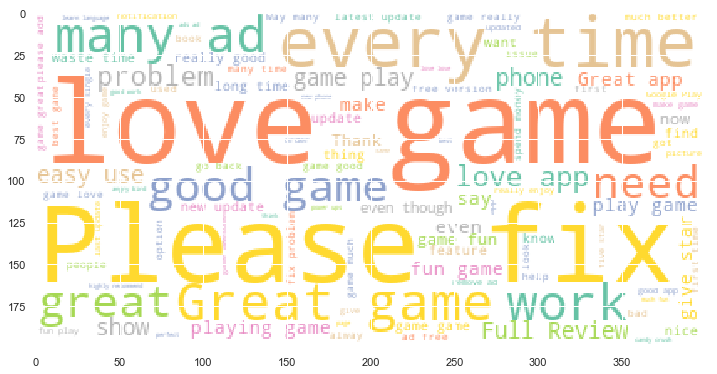

In [58]:
wc.generate(" ".join(list(corpus_free)))
fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wc)
print("Wordcloud: Free Apps")

Wordcloud: Paid Apps


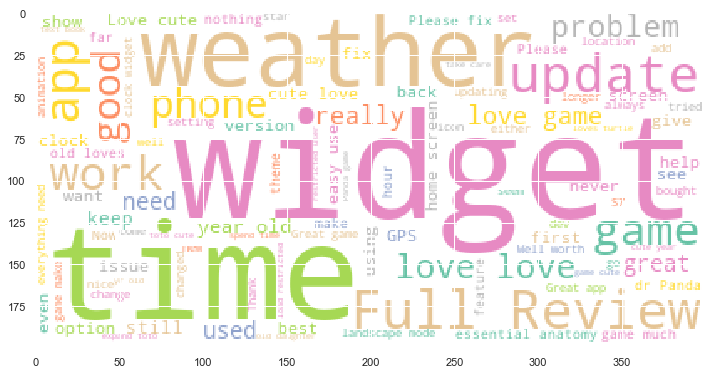

In [59]:
wc.generate(" ".join(list(corpus_paid)))
fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wc)
print("Wordcloud: Paid Apps")

## Conclusions:


1. A Developer should target categories which have high demand but lack of quality apps like Entertainment and Travel
2. Users don't usually care about app size, but lighter apps do have higher average rating. Most of the top rated apps are light.
3. Paid apps are not much downloaded by users. Whenever possible users opt for free alternatives.
4. Reviews of free apps often contain words like bugs, problems and ads. However, such words are not present in reviews of paid apps. Since, both types of apps have similar ratings, we can say that people tend to critize free apps more than paid apps.
5. Developer should opt for a business model which is not fully paid (as it will lead to less downloads), and not fully adsupported as well (which leads to lower ratings). A sweet spot between both is having ads in free version and an option for user to remove those by paying a premium.